DEEP LEARNING \  CLASIFICADOR DE IMAGENES

HACEMOS UNA CLASIFICACION DE LAS CARPERTAS 

In [7]:
import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Rutas de las carpetas de origen
carpeta_dog = 'C:\\Users\\kevin\\Desktop\\Proyecto-Tutorial-de-Clasficador-de-Imagenes-Deep-Learning-main\\data\\raw\\dog'
carpeta_cat = 'C:\\Users\\kevin\\Desktop\\Proyecto-Tutorial-de-Clasficador-de-Imagenes-Deep-Learning-main\\data\\raw\\cat'

# Rutas de las carpetas de destino
carpeta_train = 'C:\\Users\\kevin\\Desktop\\Proyecto-Tutorial-de-Clasficador-de-Imagenes-Deep-Learning-main\\data\\raw\\train'
carpeta_test = 'C:\\Users\\kevin\\Desktop\\Proyecto-Tutorial-de-Clasficador-de-Imagenes-Deep-Learning-main\\data\\raw\\test'

# Prefijos para las imágenes
prefijo_dog = 'dog_'
prefijo_cat = 'cat_'

# Función para renombrar las imágenes y moverlas a las carpetas correspondientes
def preparar_datos(origen, prefijo, destino_train, destino_test, fraccion_test=0.2):
    imagenes = os.listdir(origen)
    random.shuffle(imagenes)
    # Crear directorio de destino si no existe
    if not os.path.exists(destino_train):
        os.makedirs(destino_train)
    if not os.path.exists(destino_test):
        os.makedirs(destino_test)
    # Dividir las imágenes en train y test
    cantidad_test = int(fraccion_test * len(imagenes))
    imagenes_test = imagenes[:cantidad_test]
    imagenes_train = imagenes[cantidad_test:]
    # Mover imágenes a carpetas de train con el prefijo correspondiente
    for imagen in imagenes_train:
        nombre, extension = os.path.splitext(imagen)
        nuevo_nombre = prefijo + nombre + extension
        ruta_origen = os.path.join(origen, imagen)
        ruta_destino = os.path.join(destino_train, nuevo_nombre)
        shutil.copyfile(ruta_origen, ruta_destino)
    # Mover imágenes a carpeta de test sin prefijo
    for imagen in imagenes_test:
        ruta_origen = os.path.join(origen, imagen)
        ruta_destino = os.path.join(destino_test, imagen)
        shutil.copyfile(ruta_origen, ruta_destino)

# Preparar datos para la carpeta dog
preparar_datos(carpeta_dog, prefijo_dog, os.path.join(carpeta_train, 'dog'), carpeta_test)

# Preparar datos para la carpeta cat
preparar_datos(carpeta_cat, prefijo_cat, os.path.join(carpeta_train, 'cat'), carpeta_test)

HACEMOS QUE APAREZCA EN PANTALLA 9 IMAGENES DE CADA TIPO , TANTO DE PERROS COMO DE GATOS

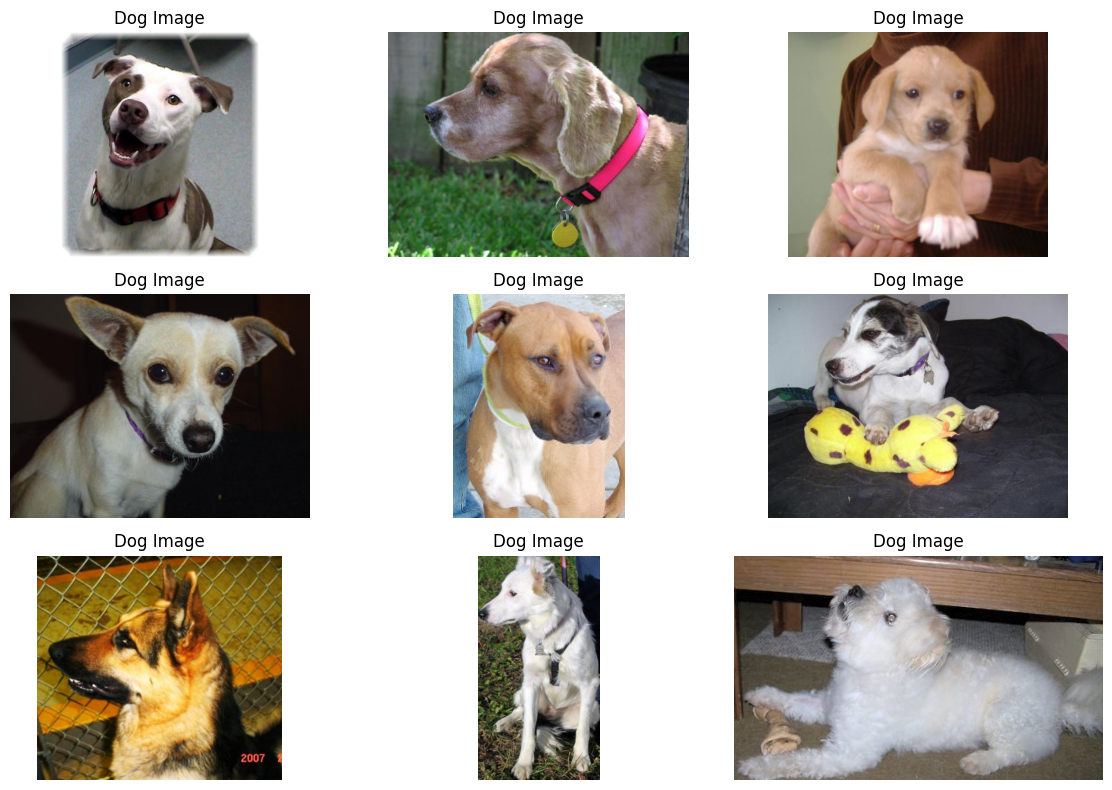

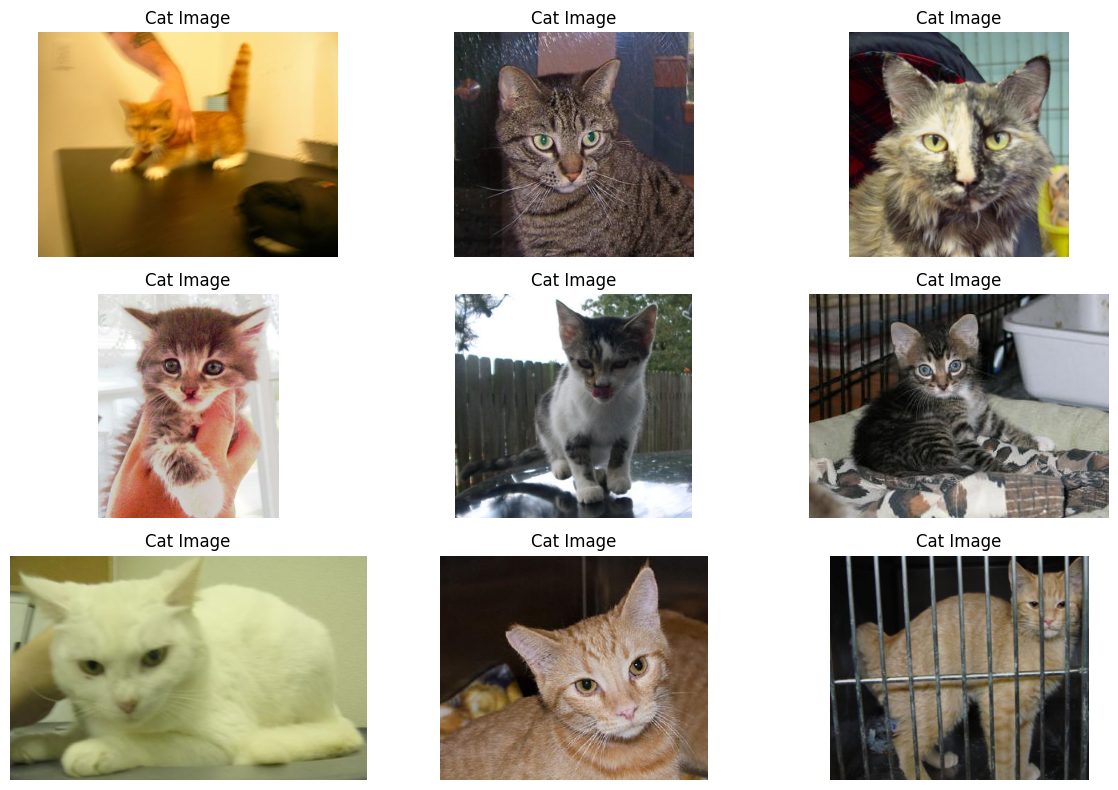

In [8]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Rutas de las carpetas de origen
carpeta_dog = 'C:\\Users\\kevin\\Desktop\\Proyecto-Tutorial-de-Clasficador-de-Imagenes-Deep-Learning-main\\data\\raw\\dog'
carpeta_cat = 'C:\\Users\\kevin\\Desktop\\Proyecto-Tutorial-de-Clasficador-de-Imagenes-Deep-Learning-main\\data\\raw\\cat'

# Función para cargar y mostrar las primeras nueve imágenes de una carpeta
def cargar_y_mostrar_imagenes(carpeta, titulo):
    # Obtener la lista de nombres de archivo de imágenes
    imagenes = os.listdir(carpeta)
    # Cargar las primeras nueve imágenes
    primeras_nueve_imagenes = []
    for i in range(9):
        img_path = os.path.join(carpeta, imagenes[i])
        img = image.load_img(img_path)
        img_array = image.img_to_array(img)
        img_array /= 255.0
        primeras_nueve_imagenes.append(img_array)
    # Crear una figura para mostrar las imágenes
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(primeras_nueve_imagenes[i])
        plt.title(titulo)
        plt.axis('off')
    # Ajustar el diseño y mostrar las imágenes
    plt.tight_layout()
    plt.show()

# Cargar y mostrar las primeras nueve imágenes de perros
cargar_y_mostrar_imagenes(carpeta_dog, 'Dog Image')

# Cargar y mostrar las primeras nueve imágenes de gatos
cargar_y_mostrar_imagenes(carpeta_cat, 'Cat Image')

GENERAMOS LAS TRAIN Y TEST PARA ENTRENAR NUESTRO MODELO

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# Define a few rules for DataGen
train_dir = "../data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"] 
)

Found 201 images belonging to 2 classes.
Found 201 images belonging to 1 classes.


ESTA ES LA ARQUITECTURA QUE NOS OFRECEN PARA ENTRENAR TODO EL CONJUNTO DEL DATASET, PERO COMO HEMOS REDUCIDO EL TAMAÑO DE NUESTRO DATASET UTILIZAMOS EL SIGUIENTE CODIGO

In [23]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten

# Define el modelo CNN
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Capa Flatten para aplanar las salidas de la última capa convolucional
model.add(Flatten())

# Capas densas para clasificación final
model.add(Dense(units=250, activation="relu"))
model.add(Dense(units=250, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

# Compila el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_43 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_45 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                

UTILIZAMOS ESTE CODIGO , APARTE DE SIMPLIQUICAR TODO EL DATASET TAMBIEN CAMBIA EL TAMAÑO DE TODAS LAS IMAGENES PARA QUE SEAN NONE Y ASI NO AFECTE AL RESULTADO. ESTO LO PODEMOS HACER PORQUE CASI TODAS LAS IMAGENES TIENEN MAS O MENOS EL MISMO TAMAÑO , SI NO TENDRIAMOS QUE CAMBIARLO MANUALMENTE.

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D

# Definir el modelo CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(None, None, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, None, None, 32)    896       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, None, None, 32)    0         
 ng2D)                                                           
                                                                 
 conv2d_62 (Conv2D)          (None, None, None, 64)    18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, None, None, 64)    0         
 ng2D)                                                           
                                                                 
 conv2d_63 (Conv2D)          (None, None, None, 64)    36928     
                                                                 
 global_average_pooling2d (  (None, 64)               

EMPEZAMOS A ENTRENAR NUESTRO MODELO

In [27]:
# Compile the Model using Adam 
from keras.optimizers import Adam
import keras

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])


LO PONEMOS CON 10 EPOCHS PARA QUE DE UN MEJOR RESULTADO

In [32]:
import scipy
# Train the Model
model.fit(train_data, epochs = 10)

Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 0.7659 - accuracy: 0.5821
Epoch 2/10
7/7 [==============================] - 10s 1s/step - loss: 1.0736 - accuracy: 0.4577
Epoch 3/10
7/7 [==============================] - 10s 1s/step - loss: 0.8578 - accuracy: 0.4876
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.7211 - accuracy: 0.5323
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.7221 - accuracy: 0.5124
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.7099 - accuracy: 0.5373
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.7114 - accuracy: 0.4726
Epoch 8/10
7/7 [==============================] - 9s 1s/step - loss: 0.6667 - accuracy: 0.6070
Epoch 9/10
7/7 [==============================] - 10s 1s/step - loss: 0.6649 - accuracy: 0.5871
Epoch 10/10
7/7 [==============================] - 9s 1s/step - loss: 0.6700 - accuracy: 0.5721


In [33]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 150, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])


Epoch 1/3
  7/150 [>.............................] - ETA: 3:26 - loss: 0.6689 - accuracy: 0.5771WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 450 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: val_accuracy improved from -inf to 0.41294, saving model to ../models\vgg16_1.h5
150/150 [==============================] - 13s 74ms/step - loss: 0.6689 - accuracy: 0.5771 - val_loss: 1.4238 - val_accuracy: 0.4129


loss: 0.6689: Este es el valor de la función de pérdida en el conjunto de datos de entrenamiento después de la última iteración. La función de pérdida es una medida de cuán mal está realizando el modelo en sus predicciones. En este caso, la pérdida es de aproximadamente 0.6689.

accuracy: 0.5771: Esta es la precisión del modelo en el conjunto de datos de entrenamiento después de la última iteración. La precisión es una medida de cuántas predicciones correctas hace el modelo en relación con el número total de predicciones. En este caso, la precisión es del 57.71%.

val_loss: 1.4238: Este es el valor de la función de pérdida en el conjunto de datos de validación después de la última iteración. Es similar a la pérdida en el conjunto de entrenamiento, pero se calcula en un conjunto de datos diferente que el modelo no ha visto durante el entrenamiento. En este caso, la pérdida en el conjunto de validación es de aproximadamente 1.4238.

val_accuracy: 0.4129: Esta es la precisión del modelo en el conjunto de datos de validación después de la última iteración. Es similar a la precisión en el conjunto de entrenamiento, pero se calcula en el conjunto de datos de validación. En este caso, la precisión en el conjunto de validación es del 41.29%.



AUNQUE EN EL ANTERIOR CODIGO LO HEMOS GUARDADO , PONEMOS AQUI EL CODIGO PARA SABER COMO SE PUEDE HACER POR SEPARADO

In [36]:
from tensorflow.keras.models import save_model

# Guardar el modelo
save_model(saved_model, "../models/Clasificador de imagenes.h5")

C:\Users\kevin\AppData\Local\Temp\ipykernel_11792\2343414356.py:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(saved_model, "../models/Clasificador de imagenes.h5")


UNA VEZ LO TENEMOS TODO PROBAMOS CAMBIANDO LAS IMAGENES A VER SI DETECTA SI ES PERRO O GATO \\ PODEMOS COMPROBAR QUE TIENE UNA EXACTITUD BASTANTE FIABLE

1/1 [==============================] - 0s 248ms/step
cat


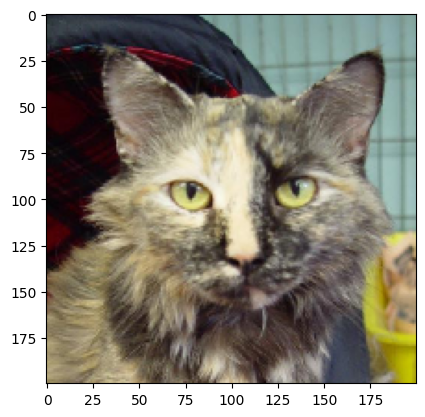

In [45]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/test/10.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")